In [83]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import shuffle
import random
%matplotlib inline

In [3]:
with open('actors_only.pkl', 'r') as picklefile:
    df = pickle.load(picklefile)

In [4]:
df.head()

,Actor,Total_Gross_2015_Dol,Num_Movies,Avg_Gross,Oscar,Birthday,Occupation,Gender,Occ_act_dummy,Num_months_rec_pd_15_20,Num_months_rec_pd_0_15,Age,Career_start,Career_fin,Age_start
0,Harrison Ford,8116.1,40,202.902500,1,1942-07-13,"Actor, producer",0,1,18,29,73,1966,present,24
1,Tom Hanks,6676.6,42,158.966667,1,1956-07-09,"Actor, filmmaker",0,1,16,29,59,1978,present,22
3,Samuel L. Jackson,5722.3,66,86.701515,1,1948-12-21,"Actor, film producer",0,1,0,39,67,1972,present,24
4,Morgan Freeman,5587.5,58,96.336207,1,1937-06-01,"Actor, director",0,1,10,19,78,1964,present,27
5,Tom Cruise,5456.0,35,155.885714,1,1962-07-03,"Actor, filmmaker",0,1,17,27,53,1981,present,19


## Challenge 1

In [5]:
#### Load dataframe and add column of ones
challenge_1 = pd.DataFrame(df['Avg_Gross'])
challenge_1['Ones'] = pd.Series([1]*(len(challenge_1['Avg_Gross'])), index=challenge_1.index)

In [6]:
# Assign X (independent) and y (dependent)
X = challenge_1.Ones
y = challenge_1.Avg_Gross

In [7]:
# Fit model
fit = sm.OLS(y,X).fit()

In [52]:
# X-values
x = np.linspace(challenge_1.Avg_Gross.min(),challenge_1.Avg_Gross.max(),len(challenge_1))

In [9]:
# Predict values
challenge_1['yhat'] = fit.predict(X)

In [10]:
challenge_1.head()

,Avg_Gross,Ones,yhat
0,202.902500,1,64.034938
1,158.966667,1,64.034938
3,86.701515,1,64.034938
4,96.336207,1,64.034938
5,155.885714,1,64.034938


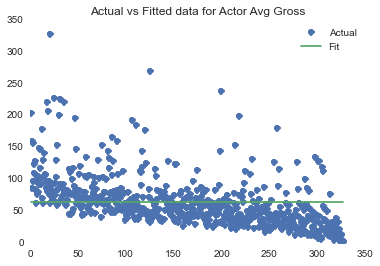

In [149]:
plt.plot(x,challenge_1.Avg_Gross,'o',x,challenge_1.yhat)
#plt.plot(challenge_1.yhat,challenge_1.Avg_Gross)
plt.title('Actual vs Fitted data for Actor Avg Gross')
plt.legend(['Actual', 'Fit'], loc='upper right')

###Given a set of numbers (Avg gross per film) and a constant predictor 1, the estimated value will be the mean and the model predicts every value as such.

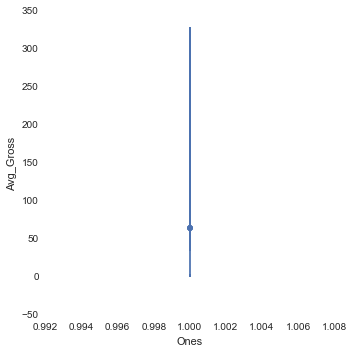

In [56]:
g = sns.FacetGrid(challenge_1, size=5)
g.map(plt.scatter, 'Ones', 'yhat')
g.map(plt.plot, "Ones", "Avg_Gross")

In [13]:
# Check mean equals coefficient 
print "Mean Avg Gross: "+str(challenge_1.Avg_Gross.mean())

Mean Avg Gross: 64.0349380401


In [14]:
# This model is not fit to explain any variability in the data (R^2 == 0)
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:              Avg_Gross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 13 Jul 2015   Prob (F-statistic):                nan
Time:                        11:24:13   Log-Likelihood:                -3196.7
No. Observations:                 626   AIC:                             6395.
Df Residuals:                     625   BIC:                             6400.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones          64.0349      1.598     40.075      0.0

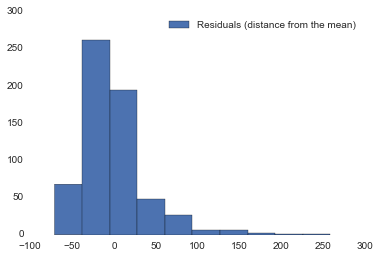

In [151]:
fig, ax = plt.subplots()
ax.hist(fit.resid,bins=10)
plt.legend(['Residuals (distance from the mean)'], loc='upper right')

### The residual histogram displays the shape of the dataset, measuring the difference between the actual values and the mean.

## Challenge 2

In [17]:
challenge_2 = pd.DataFrame(data=[df['Avg_Gross'],df['Age_start']])

In [18]:
challenge_2 = challenge_2.transpose()

In [19]:
challenge_2.head()

,Avg_Gross,Age_start
0,202.902500,24
1,158.966667,22
3,86.701515,24
4,96.336207,27
5,155.885714,19


In [20]:
challenge_2 = challenge_2[np.isfinite(challenge_2['Age_start'])]

In [21]:
len(challenge_2)

617

In [22]:
# Assign X and y
X = challenge_2.Age_start
X = sm.add_constant(X)
y = challenge_2.Avg_Gross

In [23]:
# Fit model
fit = sm.OLS(y,X).fit()

In [24]:
# This model is not fit to explain any variability in the data (R^2 == 0)
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              Avg_Gross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1375
Date:                Mon, 13 Jul 2015   Prob (F-statistic):              0.711
Time:                        11:24:14   Log-Likelihood:                -3152.0
No. Observations:                 617   AIC:                             6308.
Df Residuals:                     615   BIC:                             6317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         66.0457      5.059     13.056      0.0

In [62]:
# X-values
x1 = np.linspace(challenge_2.Avg_Gross.min(),challenge_2.Avg_Gross.max(),len(challenge_2))

In [26]:
# Generate predictions
challenge_2['yhat'] = fit.predict(X)

In [27]:
challenge_2.head()

,Avg_Gross,Age_start,yhat
0,202.902500,24,63.789054
1,158.966667,22,63.977104
3,86.701515,24,63.789054
4,96.336207,27,63.506978
5,155.885714,19,64.259180


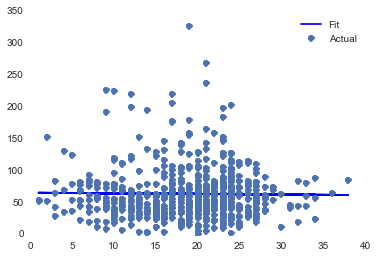

In [61]:
# Plot feature variable vs Prediction (line) and Actual (scatter)
# Not a fit
fig, ax = plt.subplots()
ax.plot(challenge_2.Age_start, challenge_2.yhat, 'b-', label="Prediction")
ax.plot(challenge_2.Age_start, y, 'o', label="True")
plt.legend(['Fit', 'Actual'], loc='upper right')

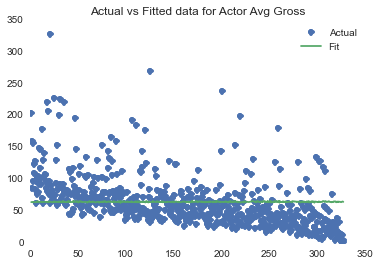

In [66]:
plt.plot(x1,challenge_2.Avg_Gross,'o',x1,challenge_2.yhat)
plt.title('Actual vs Fitted data for Actor Avg Gross')
plt.legend(['Actual', 'Fit'], loc='upper right')

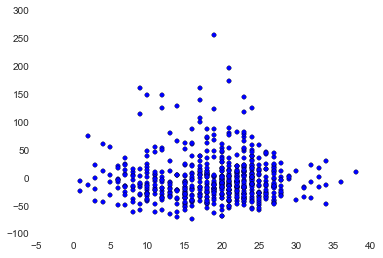

In [152]:
# Feature variable vs Residuals
# Chaos
plt.scatter(challenge_2.Age_start,fit.resid)

### The relationship between total gross of films featuring a certain actor, and the age in which an actor begins his/her career, is proven not to be linear.

## Challenge 3

In [30]:
challenge_3 = pd.DataFrame(data=[df['Avg_Gross'],df['Age_start'],df['Gender'],df['Oscar']])

In [31]:
challenge_3 = challenge_3.transpose()

In [32]:
challenge_3 = pd.DataFrame(challenge_3[np.isfinite(challenge_3['Age_start'])])

In [33]:
challenge_3.head()

,Avg_Gross,Age_start,Gender,Oscar
0,202.902500,24,0,1
1,158.966667,22,0,1
3,86.701515,24,0,1
4,96.336207,27,0,1
5,155.885714,19,0,1


In [34]:
y, X = dmatrices('Avg_Gross ~ Age_start + Gender + Oscar', data=challenge_3, return_type='dataframe')

In [35]:
fit = sm.OLS(y, X).fit()

In [36]:
# The incorporation of more variables helps to explain a bit more of the variability in the data (R^2 == .025)
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              Avg_Gross   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.330
Date:                Mon, 13 Jul 2015   Prob (F-statistic):            0.00125
Time:                        11:24:16   Log-Likelihood:                -3144.1
No. Observations:                 617   AIC:                             6296.
Df Residuals:                     613   BIC:                             6314.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     73.0616      5.457     13.388      0.0

In [37]:
challenge_3['yhat'] = fit.predict(X)

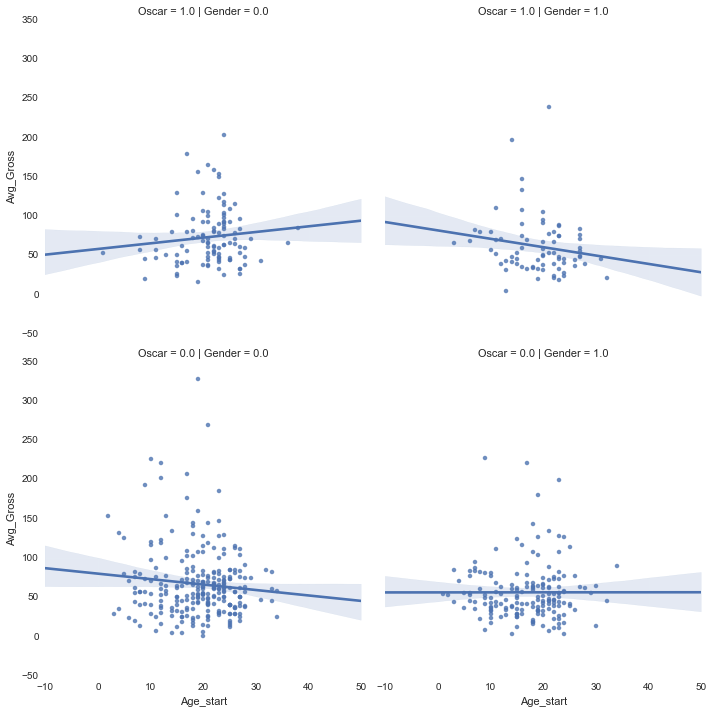

In [38]:
sns.lmplot(x="Age_start", y="Avg_Gross",
           col="Gender", row="Oscar", data=challenge_3)

### Being both male and an Oscar winner/nominee is positively correlated with Avg gross per film.

## Challenge 4

In [39]:
challenge_4 = pd.DataFrame(data=[df['Avg_Gross'],df['Age_start'],df['Num_Movies'],df['Gender'],df['Oscar'],df['Num_months_rec_pd_0_15'],df['Num_months_rec_pd_15_20']])

In [40]:
challenge_4 = challenge_4.transpose()

In [41]:
challenge_4 = pd.DataFrame(challenge_4[np.isfinite(challenge_4['Age_start'])])
challenge_4.head()

,Avg_Gross,Age_start,Num_Movies,Gender,Oscar,Num_months_rec_pd_0_15,Num_months_rec_pd_15_20
0,202.902500,24,40,0,1,29,18
1,158.966667,22,42,0,1,29,16
3,86.701515,24,66,0,1,39,0
4,96.336207,27,58,0,1,19,10
5,155.885714,19,35,0,1,27,17


In [139]:
y, X = dmatrices('Avg_Gross ~ Age_start + Num_Movies + Gender + Oscar + Num_months_rec_pd_0_15 + Num_months_rec_pd_15_20', 
                 data=challenge_4, return_type='dataframe')

In [140]:
fit = sm.OLS(y, X).fit()

In [141]:
challenge_4['yhat'] = fit.predict(X)

In [142]:
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              Avg_Gross   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.403
Date:                Mon, 13 Jul 2015   Prob (F-statistic):            0.00261
Time:                        12:14:38   Log-Likelihood:                -3141.9
No. Observations:                 617   AIC:                             6298.
Df Residuals:                     610   BIC:                             6329.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

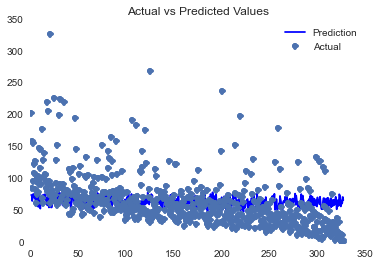

In [145]:
x1 = np.linspace(challenge_4.Avg_Gross.min(),challenge_4.Avg_Gross.max(),
                 len(challenge_4.Avg_Gross))
fig, ax = plt.subplots()
ax.plot(x1, challenge_4.yhat, 'b-', label="Prediction")
ax.plot(x1, challenge_4.Avg_Gross, 'o', label="Actual")
ax.legend(loc="best")
plt.title("Actual vs Predicted Values")

## Challenge 5

In [132]:
split = int(round(len(challenge_4)/1.3))
split # 3/4 of data

475

In [111]:
challenge_4 = challenge_4.reset_index(drop=True)

In [124]:
indices = np.random.permutation(challenge_4.shape[0]) # shuffle indices
training_idx, test_idx = indices[:split], indices[split:] 
df_tr = challenge_4.loc[training_idx] # partition data for training
df_ts = challenge_4.loc[test_idx] # partition data for testing

In [125]:
# Training set
y, X = dmatrices('Avg_Gross ~ Age_start + Num_Movies + Gender + Oscar + Num_months_rec_pd_0_15 + Num_months_rec_pd_15_20', 
                 data=df_tr, return_type='dataframe')

In [127]:
# Test set
y_ts, X_ts = dmatrices('Avg_Gross ~ Age_start + Num_Movies + Gender + Oscar + Num_months_rec_pd_0_15 + Num_months_rec_pd_15_20', 
                 data=df_ts, return_type='dataframe')

In [137]:
fit = sm.OLS(y, X).fit()

In [129]:
test = fit.predict(X_ts)

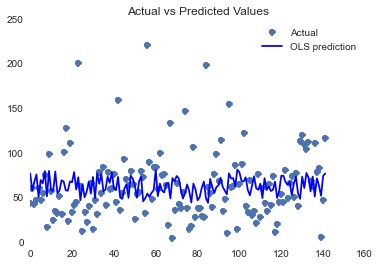

In [146]:
fig, ax = plt.subplots()
ax.plot(y_ts, 'o', label="Actual")
ax.plot(test, 'b-', label="OLS prediction")
ax.legend(loc="best")
plt.title("Actual vs Predicted Values")

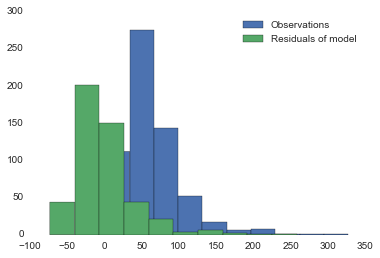

In [138]:
fig, ax = plt.subplots()
ax.hist(challenge_4.Avg_Gross,bins=10)
ax.hist(fit.resid,bins=10)
plt.legend(['Observations', 'Residuals of model'], loc='upper right')